# Credit Scoring Model 

## Data Pre-Processing

In [1]:
# Essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             classification_report, confusion_matrix)


In [2]:

# Define the path to your XLSX file
file_path = 'train.xlsx'  # Use raw string or escape backslashes

# Load the XLSX file into a DataFrame
df = pd.read_excel(file_path, engine='openpyxl')  # 'openpyxl' is commonly used for .xlsx files

# Display the first few rows of the DataFrame
print(df.head())


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [3]:
print('Data Size : ',df.shape)

Data Size :  (100000, 28)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**Dataset consists of missing values.**

In [6]:
# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [9]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 1788
Unique values: [23 -500 '28_' ... '4808_' 2263 1342]


Occupation:
Number of unique values in the Occupation: 16
Unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income:
Number of unique values in the Annual_Income: 18940
Unique values: [19114.12 34847.84 '34847.84_' ... 20002.88 39628.99 '39628.99_']


Num_of_Loan:
Number of unique values in the Num_of_Loan: 434
Unique values: [4 1 3 967 -100 0 '0_' 2 '3_' '2_' 7 5 '5_' 6 8 '8_' 9 '9_' '4_' '7_' '1_'
 1464 '6_' 622 352 472 1017 945 146 563 341 444 720 1485 49 737 1106 466
 728 313 843 '597_' 617 119 663 640 '92_' 1019 501 1302 39 716 848 931
 1214 186 424 1001 1110 1152 457 1433 1187 52 1480 1047 1035

Number of unique values in the Amount_invested_monthly: 91049
Unique values: [80.4152954390025 118.280221622367 81.699521264648 ... 24.0284774486444
 251.672582197216 167.163865161045]


Payment_Behaviour:
Number of unique values in the Payment_Behaviour: 7
Unique values: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


Monthly_Balance:
Number of unique values in the Monthly_Balance: 98792
Unique values: [312.494088679436 284.629162496071 331.209862853791 ... 516.809083274281
 319.164978525709 393.67369556188]


Credit_Score:
Number of unique values in the Credit_Score: 3
Unique values: ['Good' 'Standard' 'Poor']




In [10]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

## Data Encoding

In [11]:
df["Month"].value_counts()

Month
July        9377
January     9341
March       9325
June        9295
April       9237
February    9210
August      9198
May         9181
Name: count, dtype: int64

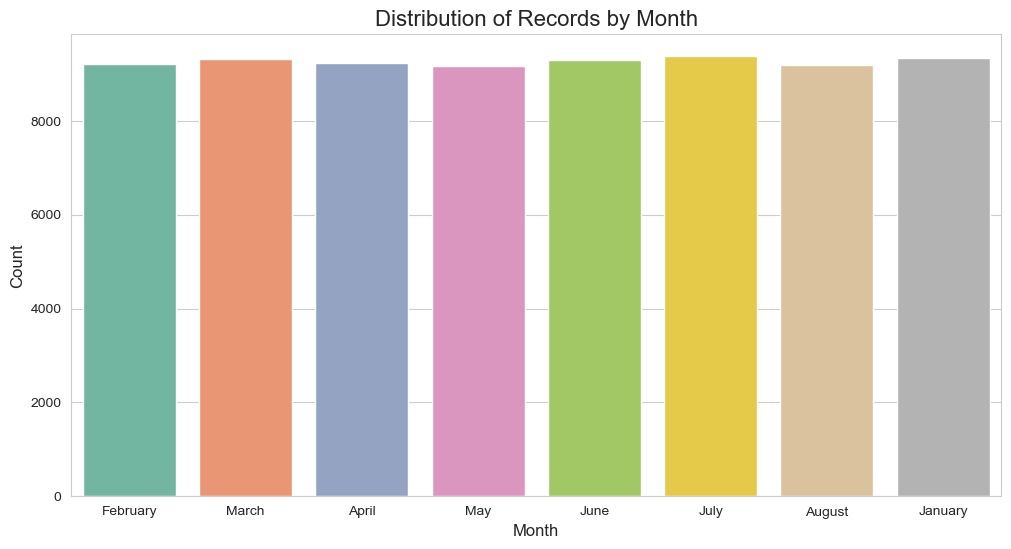

In [12]:

sns.set_style("whitegrid")

# Adjusting the figure size and plot orientation
plt.figure(figsize=(12,6))
sns.countplot(x="Month", data=df, palette="Set2")

# Adding a title and labels
plt.title("Distribution of Records by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Displaying the plot
plt.show()


In [13]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [14]:
df["Occupation"].value_counts()

Occupation
Lawyer           5259
Engineer         5077
Architect        5073
Scientist        5052
Accountant       5042
Mechanic         5001
Media_Manager    4978
Developer        4967
Teacher          4930
Entrepreneur     4911
Journalist       4884
Doctor           4860
Manager          4756
Musician         4702
Writer           4672
Name: count, dtype: int64

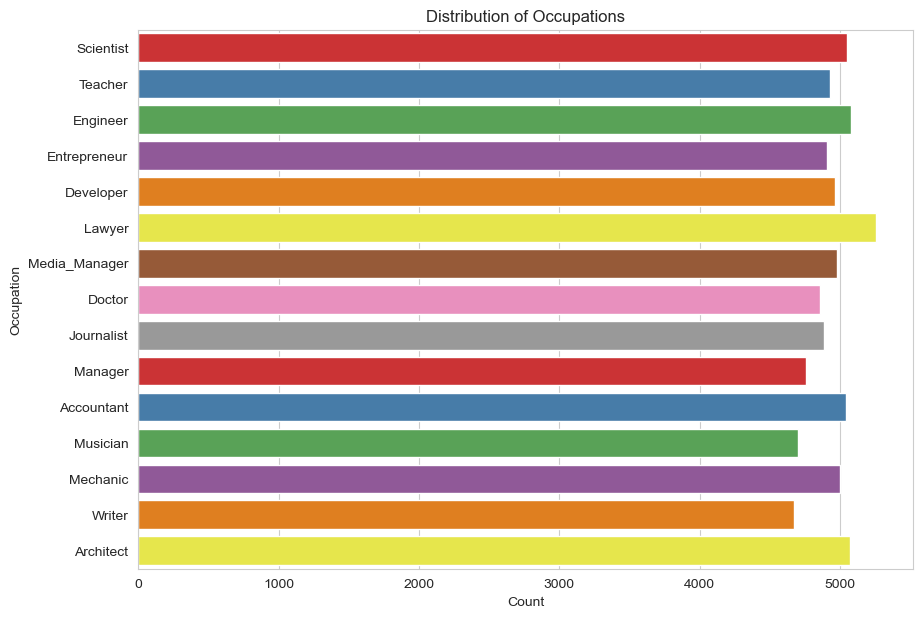

In [15]:

plt.figure(figsize=(10, 7))  # Adjusted size for better readability
sns.countplot(y="Occupation", data=df, palette="Set1")
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Occupation')  # Label for the y-axis
plt.title('Distribution of Occupations')  # Title of the plot
plt.show()


In [16]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [17]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    33916
Good        22618
Bad         17630
Name: count, dtype: int64

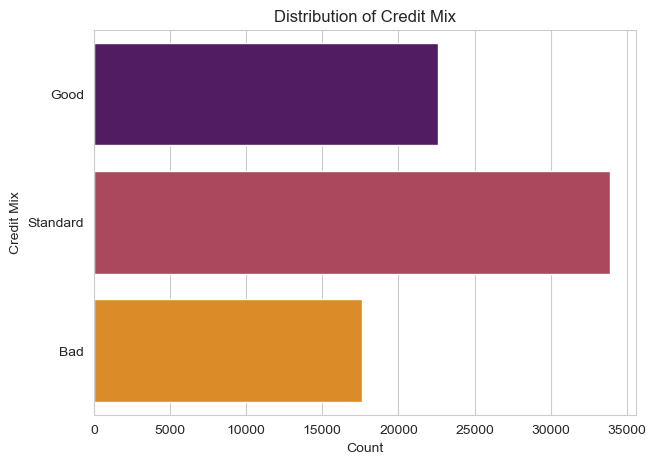

In [18]:

plt.figure(figsize=(7, 5))  # Adjust size if needed
sns.countplot(y="Credit_Mix", data=df, palette="inferno")
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Credit Mix')  # Label for the y-axis
plt.title('Distribution of Credit Mix')  # Title of the plot
plt.show()


In [19]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [20]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: count, dtype: int64

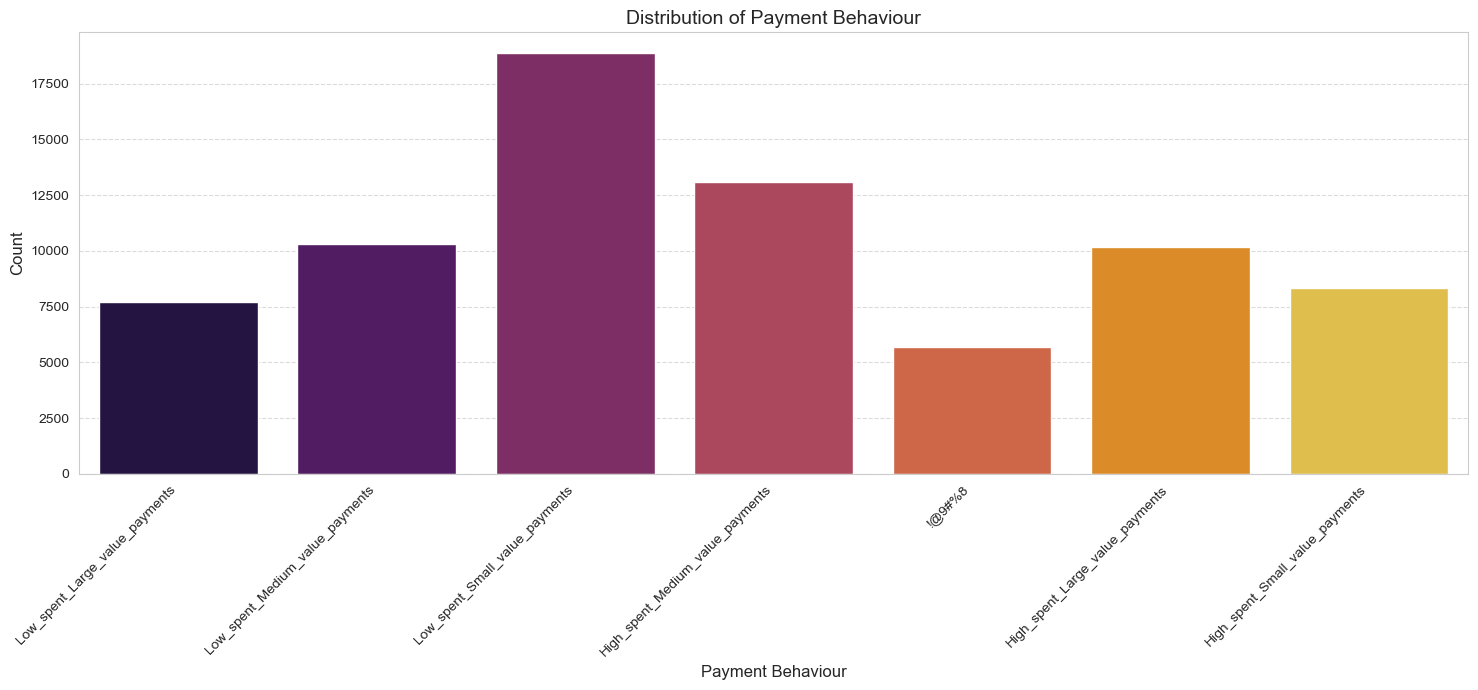

In [21]:

plt.figure(figsize=(15, 7))  # Large figure size for better visibility
sns.countplot(x="Payment_Behaviour", data=df, palette="inferno")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Payment Behaviour', fontsize=12)  # Label for the x-axis
plt.ylabel('Count', fontsize=12)  # Label for the y-axis
plt.title('Distribution of Payment Behaviour', fontsize=14)  # Title of the plot

# Optionally, add gridlines for better readability of count values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [22]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [23]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [24]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    38737
No     26501
NM      8926
Name: count, dtype: int64

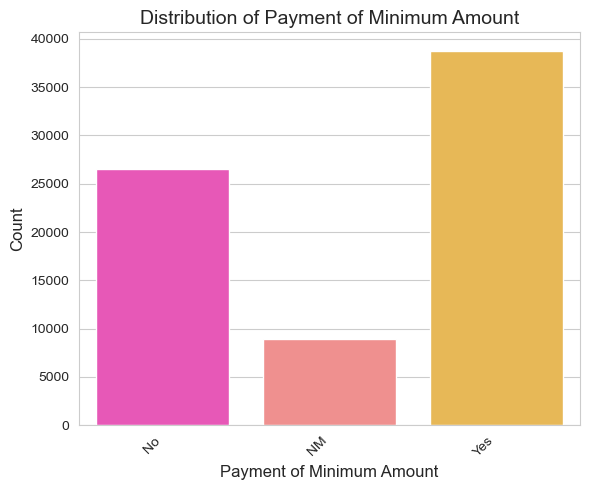

In [25]:


plt.figure(figsize=(6, 5))  # Adjust size as needed
sns.countplot(x="Payment_of_Min_Amount", data=df, palette="spring")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Payment of Minimum Amount', fontsize=12)  # Label for the x-axis
plt.ylabel('Count', fontsize=12)  # Label for the y-axis
plt.title('Distribution of Payment of Minimum Amount', fontsize=14)  # Title of the plot

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [26]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [27]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    39441
Poor        21509
Good        13214
Name: count, dtype: int64

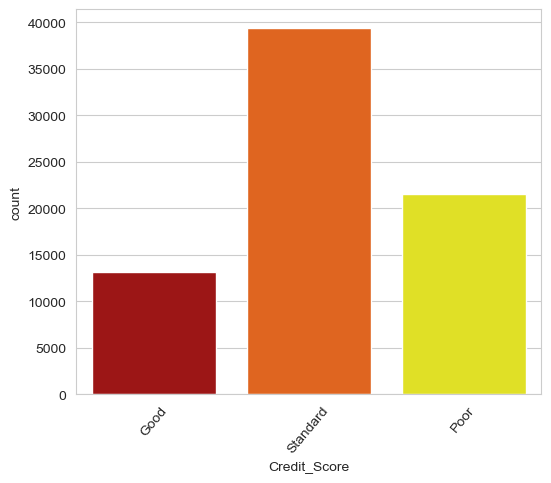

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [29]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

## Handling Missing Data


In [30]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11112
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       5195
Changed_Credit_Limit            0
Num_Credit_Inquiries         1472
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6717
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3356
Payment_Behaviour            5676
Monthly_Balance               906
Credit_Score                    0
dtype: int64

In [31]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [32]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [33]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

In [34]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [35]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

In [36]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [37]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)

In [38]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [39]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**All missing values have been handled**

In [40]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [41]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [42]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [43]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [44]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [45]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

## Data Visualization

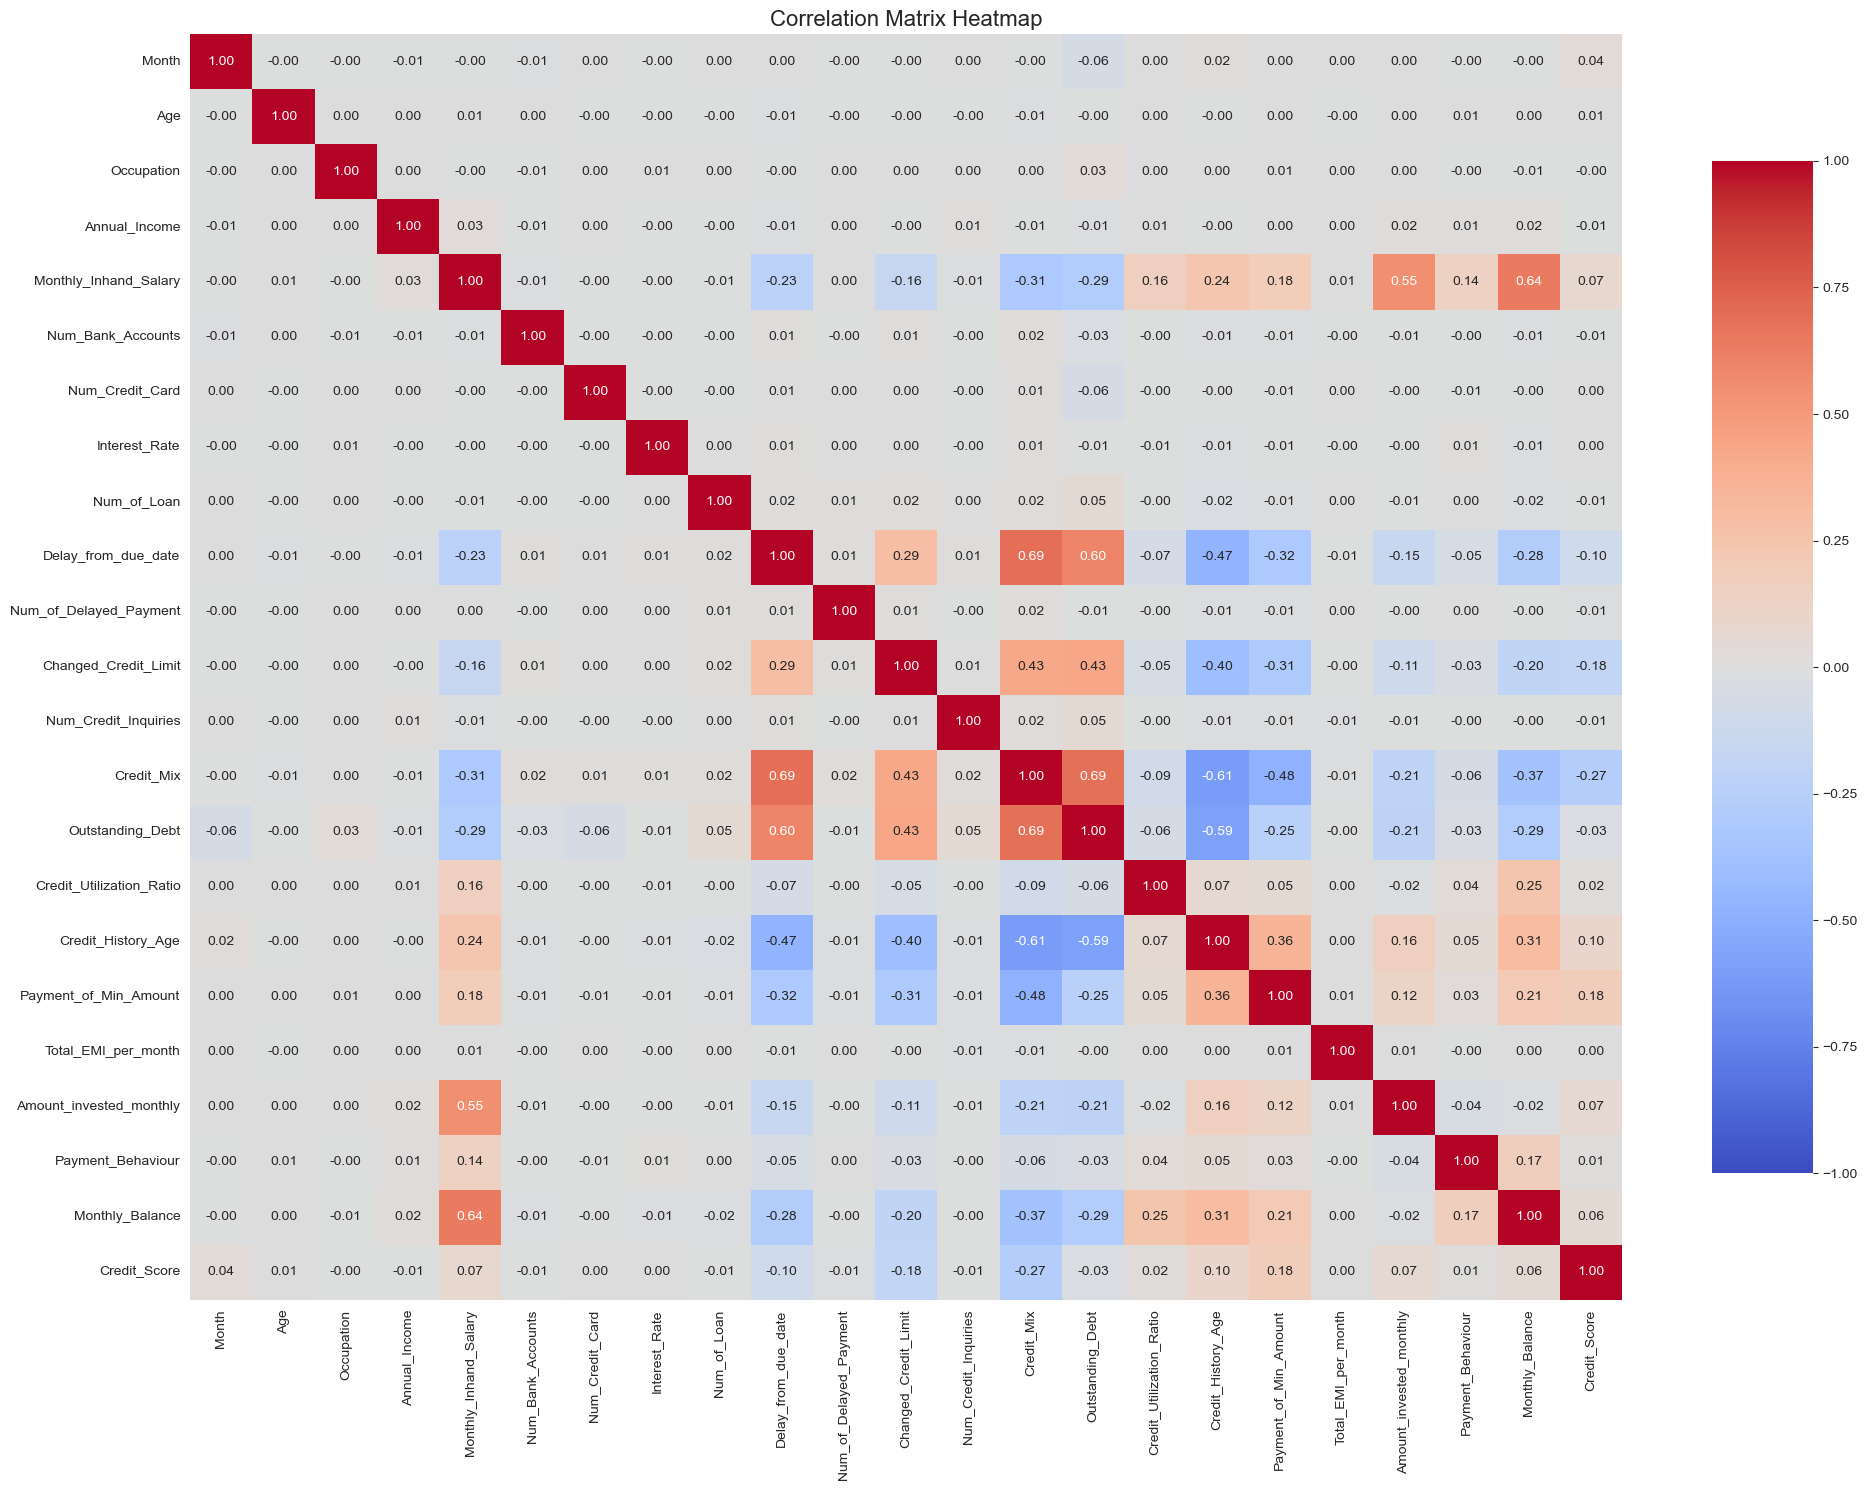

In [46]:
cr = df.corr()

plt.figure(figsize=(20, 15))  # Adjusted size for better visibility
sns.heatmap(
    cr,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Format for annotation
    cmap="coolwarm",  # Color map for better contrast
    vmin=-1,  # Minimum value for color bar
    vmax=1,  # Maximum value for color bar
    cbar_kws={'shrink': .8, 'aspect': 10}  # Customize color bar
)

plt.title('Correlation Matrix Heatmap', fontsize=16)  # Title of the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

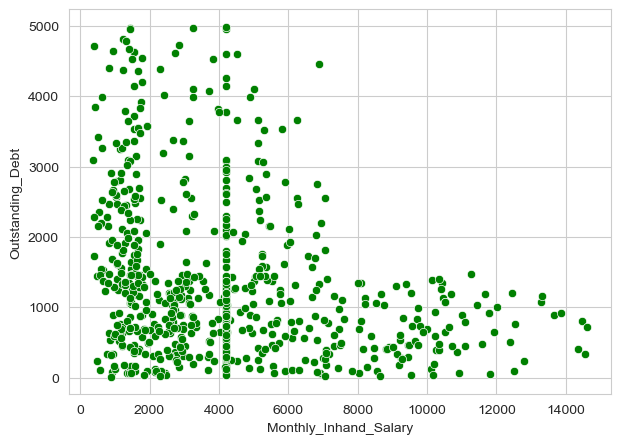

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="green")
plt.show()

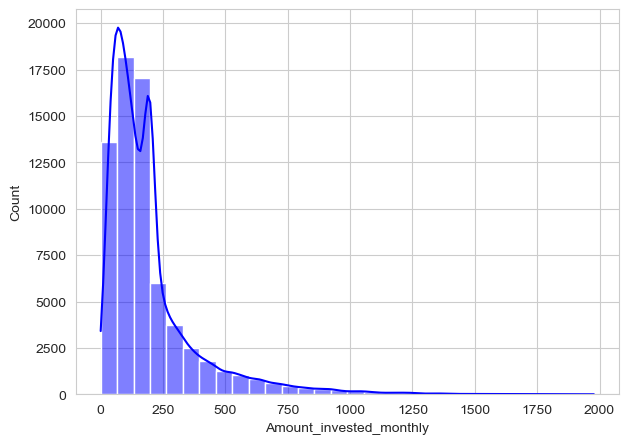

In [48]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="blue")
plt.show()

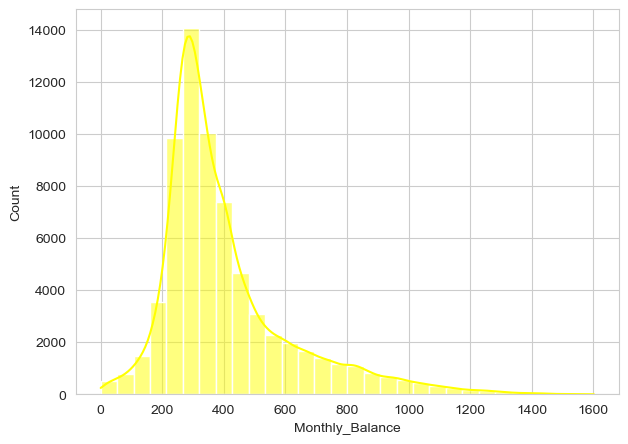

In [49]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="yellow")
plt.show()

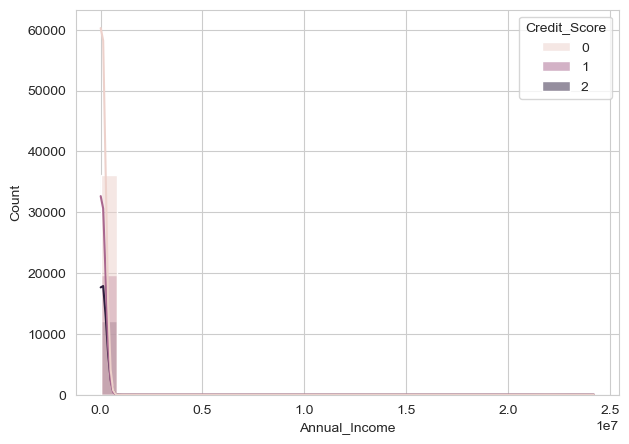

In [50]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

## Data Scaling


In [51]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [52]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [53]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

We will be training the dataset on Extreme Gradient Boosting Classifier model




In [58]:
#!pip install xgboost
#!pip install lightgbm



  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 163.8 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.4 MB 163.8 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.4 MB 163.8 kB/s eta 0:00:09
   - -------------------------------------- 0.0/1.4 MB 131.3 kB/s eta 0:00:11
   - -------------------------------------- 0.1/1.4 MB 182.2 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.4 MB 187.3 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.4 MB 218.5 kB/s eta 0:00:07
   --- ---------------------------------

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Extreme Gradient Boosting Classifier

In [60]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.6965980435100014


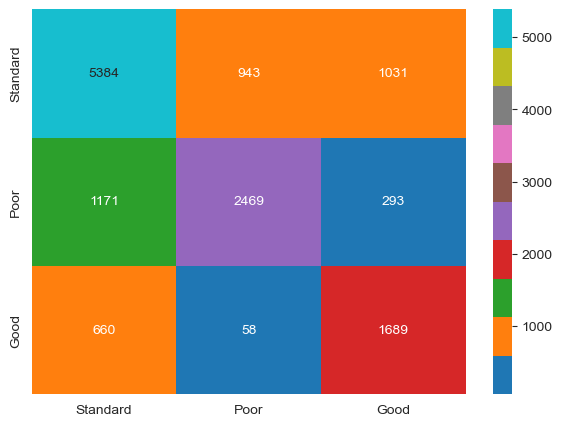

In [62]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [63]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.75      0.73      0.74      7358
        Poor       0.71      0.63      0.67      3933
        Good       0.56      0.70      0.62      2407

    accuracy                           0.70     13698
   macro avg       0.67      0.69      0.68     13698
weighted avg       0.70      0.70      0.70     13698



In [64]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.6684542620023494


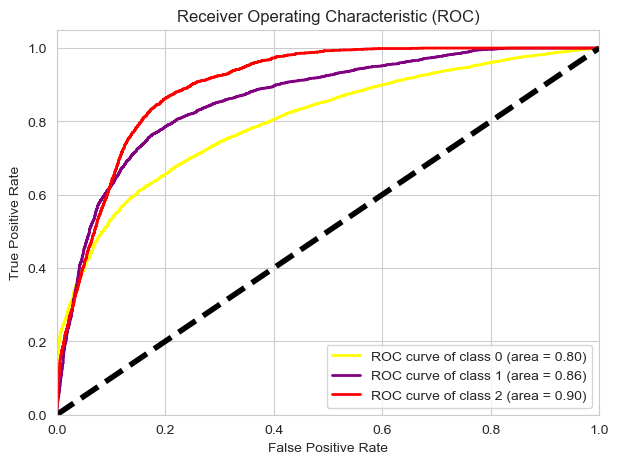

In [65]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['yellow', 'purple', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Model Evaluation 

# End of Task 
